# Formalia:

Please read the [assignment overview page](https://github.com/lalessan/comsocsci2022/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday, April 5th at 23:55. Hand in your Jupyter notebook file (with extension `.ipynb`) via DTU Learn _(Course Content, Assignemnts, Assignment 2)_


Remember to include in the first cell of your notebook:
* the link to your group's Git repository
* group members' contributions

In [1]:
#Importing of packages
import nltk
from nltk import word_tokenize
import re
import numpy as np
import pandas as pd
import datetime as dt
from collections import Counter
from nltk.corpus import stopwords
import math
from wordcloud import WordCloud
english_words = set(nltk.corpus.words.words())
stopwords=set(stopwords.words('english'))
import shifterator as sh

## Part 1: TF-IDF

For this exercise, you need the following data: 
* The r/wallstreetbets submissions (either the one provided by me [here](https://github.com/lalessan/comsocsci2021/blob/master/data/wallstreet_subs.csv.gz) or the one you downloaded in Week 6).
* The list of 15 stocks you identified in Week 6, Exercise 2.

_Exercise_


> 1. Tokenize the __text__ of each submission. Create a column __tokens__ in your dataframe containing the tokens. Remember to follow the instructions in Week 6, Exercise 3.  
> 2. Find submissions discussing at least one of the top 15 stocks you identified above (follow the instructions in Week 6, Exercise 3).
> 3. Now, we want to find out which words are important for each *stock*, so we're going to create several ***large documents, one for each stock***. Each document includes all the tokens related to the same stock. We will also have a document including discussions that do not relate to the top 15 stocks.
> 4. Now, we're ready to calculate the TF for each word. Find the top 5 terms within __5 stocks of your choice__. 
>   * Describe similarities and differences between the stocks.
>   * Why aren't the TFs not necessarily a good description of the stocks?
>   * Next, we calculate IDF for every word. 
>   * What base logarithm did you use? Is that important?
> 5. We're ready to calculate TF-IDF. Do that for the __5 stock of your choice__. 
>   * List the 10 top TF words for each stock.
>  * List the 10 top TF-IDF words for each stock.
>   * Are these 10 words more descriptive of the stock? If yes, what is it about IDF that makes the words more informative?
> 6. Visualize the results in a Wordcloud and comment your results (follow the instrutions in Week 6, Exercise 4). 


For this exercise, you need the following data: 
* The r/wallstreetbets submissions (either the one provided by me [here](https://github.com/lalessan/comsocsci2021/blob/master/data/wallstreet_subs.csv.gz) or the one you downloaded in Week 6).
* The list of 15 stocks you identified in Week 6, Exercise 2.

In [2]:
#Importing the dataset
df = pd.read_csv('../assignment2/wallstreet_subs.csv')

In [3]:
#Creation and implementation of the 'textsubmission' column
x=df['title']
y=df['selftext']
x_1=[]
y_1=[]
for i in range(len(df)):
    x_1.append(x[i])
    y_1.append(y[i])
list1=[]
for i in range(len(df)):
    list1.append(x_1[i]+' '+y_1[i])
    
df['textsubmission']=list1

In [4]:
#Finding every word starting with '$'
b=str(list(df['textsubmission']))
reg_ex=('\$\w+')

c=re.findall(reg_ex,b) 

#Removing the '$'
c = [e[1:] for e in c]

In [5]:
#Removing every element containing a number
test = [x for x in c if not any(x1.isdigit() for x1 in x)] 

In [6]:
#Making everything uppercase
main_list=[x.upper() for x in test] 

In [7]:
#Finding the top 15 tags
word_counter = {}
for word in main_list:
    if word in word_counter:
        word_counter[word] += 1
    else:
         word_counter[word] = 1

popular_words = sorted(word_counter, key = word_counter.get, reverse = True)
top_15 = popular_words[:15]
top_15

['SPY',
 'TSLA',
 'SPCE',
 'PLTR',
 'MSFT',
 'ROPE',
 'AAPL',
 'AMZN',
 'NIO',
 'ZM',
 'AMD',
 'BABA',
 'GME',
 'DIS',
 'BA']

_Exercise_


> 1. Tokenize the __text__ of each submission. Create a column __tokens__ in your dataframe containing the tokens. Remember to follow the instructions in Week 6, Exercise 3. 

In [8]:
#Making the "selftext" column a list
liste_selftext=[]
for i in range(len(df['selftext'])):
    liste_selftext.append(df['selftext'][i])

In [9]:
#Removing URLS
liste_selftext_1=[]
for i in range(len(liste_selftext)):
    liste_selftext_1.append(re.sub(r'http\S+','',str(liste_selftext[i])))

In [10]:
#Removing numbers
def remove(list):
    pattern = '[0-9]'
    list = [re.sub(pattern, '', i) for i in list]
    return list

liste_selftext_2 = remove(liste_selftext_1)

In [11]:
#Making everything lowercase
liste_selftext_3=[x.lower() for x in liste_selftext_2] 

In [12]:
#Removing stop words
def remove_stopwords(data):
    output_array=[]
    for sentence in data:
        temp_list=[]
        for word in sentence.split():
            if word not in stopwords:
                temp_list.append(word)
        output_array.append(' '.join(temp_list))
    return output_array

liste_selftext_4=remove_stopwords(liste_selftext_3)

In [13]:
#Tokenizing the list and removing punctuation
tokenizer = nltk.RegexpTokenizer(r"\w+")
liste_token=[]
for i in range(len(df['selftext'])):
    liste_token.append(tokenizer.tokenize(str(liste_selftext_4[i])))

In [14]:
#remove stopwords that were "hidden" in punctuation
liste_token2=[]
for i in range(len(liste_token)):
    test=[]
    for j in liste_token[i]:
        if j not in stopwords:
            test.append(j)
    liste_token2.append(test)

In [15]:
#removing duplicates within the same sublist
list_tokens = []
for i in range(len(liste_token2)):
    a=[]
    for elem in liste_token2[i]:
        if elem not in a:
            a.append(elem)
    list_tokens.append(a)

In [16]:
#Adding the tokens column to the df
df['tokens']=list_tokens

## Part 2: Sentiment analysis

_Exercise: Creating Word Shifts_
>    1. Pick a day of your choice in 2020. We call it $d$. It is more interesting if you pick a day where you expect something relevant to occur (e.g. Christmas, New Year, Corona starting, the market crashes...).
>    2. Build two lists $l$ and $l_{ref}$ containing all tokens for submissions posted on r/wallstreebets on day $d$, and in the 7 days preceding day $d$, respectively. 
>    3. For each token $i$, compute the relative frequency in the two lists $l$ and $l_{ref}$. We call them $p(i,l)$ and $p(i,l_{ref})$, respectively. The relative frequency is computed as the number of times a token occurs over the total length of the document. Store the result in a dictionary.
>    4. For each token $i$, compute the difference in relative frequency $\delta p(i) = p(i,l) - p(i,l_{ref})$. Store the values in a dictionary. Print the top 10 tokens (those with largest relative frequency). Do you notice anything interesting?
>    5. Now, for each token, compute the happiness $h(i) = labMT(i) - 5$, using the labMT dictionary. Here, we subtract $5$, so that positive tokens will have a positive value and negative tokens will have a negative value. Then, compute the product $\delta \Phi = h(i)\cdot \delta p(i)$. Store the results in a dictionary. 
>    6. Print the top 10 tokens, ordered by the absolute value of $|\delta \Phi|$. Explain in your own words the meaning of $\delta \Phi$. If that is unclear, have a look at [this page](https://shifterator.readthedocs.io/en/latest/cookbook/weighted_avg_shifts.html).
>    7. Now install the [``shifterator``](https://shifterator.readthedocs.io/en/latest/installation.html) Python package. We will use it for plotting Word Shifts. 
>    8. Use the function ``shifterator.WeightedAvgShift`` to plot the WordShift, showing which words contributed the most to make your day of choice _d_ happier or more sad then days in the preceding 7 days. Comment on the figure. 
>    9. How do words that you printed in step 6 relate to those shown by the WordShift? 

In [17]:
# making daily_words
df['date'] = pd.to_datetime(df['created_utc'], unit='s')
df.set_index('date', inplace=True)

daily_words = df['tokens'].resample('D').sum()
daily_words

date
2019-12-31    [aight, boys, time, come, found, girl, used, w...
2020-01-01    [happy, new, year, everyone, stay, hydrated, a...
2020-01-02    [thing, goods, cost, people, saving, complain,...
2020-01-03    [thought, would, interesting, see, fund, weigh...
2020-01-04    [bit, rocky, year, started, making, immense, a...
                                    ...                        
2020-12-27    [got, bunch, nio, wanted, hold, pump, occurrin...
2020-12-28    [saw, day, water, futures, issued, cme, nasdaq...
2020-12-29    [every, time, new, submission, posted, wallstr...
2020-12-30    [listen, autistic, fucks, warren, buy, dip, ba...
2020-12-31    [every, time, new, submission, posted, wallstr...
Freq: D, Name: tokens, Length: 367, dtype: object

In [18]:
# 2-1
d = dt.datetime(2020,3,8)
d_min = d - dt.timedelta(days=7)

In [19]:
# 2-2
l = daily_words.loc[d]
l_ref = np.concatenate(daily_words[(daily_words.index<d) & (daily_words.index>d_min)].values)
l_ref

array(['k', 'march', 'spx', ..., 'played', 'fucking', 'retards'],
      dtype='<U45')

In [20]:
# 2-3
p = dict([(item[0], item[1]/len(l)) for item in Counter(l).items()])
p_ref = dict([(item[0], item[1]/len(l_ref)) for item in Counter(l_ref).items()])
p

{'docusign': 8.785802143735723e-05,
 'employees': 0.00043929010718678614,
 'working': 0.001142154278685644,
 'home': 0.0013178703215603585,
 'entire': 0.0005271481286241434,
 'month': 0.0015814443858724301,
 'offices': 0.00017571604287471446,
 'closed': 0.0003514320857494289,
 'walking': 8.785802143735723e-05,
 'store': 0.00017571604287471446,
 'wait': 0.0008785802143735723,
 'group': 0.0005271481286241434,
 'beckys': 8.785802143735723e-05,
 'grab': 0.00017571604287471446,
 'individual': 0.00017571604287471446,
 'carts': 8.785802143735723e-05,
 'oe': 8.785802143735723e-05,
 'said': 0.0013178703215603585,
 'okay': 0.00043929010718678614,
 'everyone': 0.0018450184501845018,
 'set': 0.0010542962572482868,
 'timers': 8.785802143735723e-05,
 'saw': 0.0005271481286241434,
 'several': 0.00017571604287471446,
 'heaping': 8.785802143735723e-05,
 'top': 0.0007028641714988579,
 'easily': 0.0007028641714988579,
 'people': 0.005183623264804076,
 'everywhere': 0.0002635740643120717,
 'models': 0.000

In [21]:
# 2-4
all_tokens = set(p.keys()).union(set(p_ref.keys()))
dp = dict([(token, p.get(token,0) - p_ref.get(token,0)) for token in all_tokens])
sorted(dp.items(), key = lambda x:x[1], reverse=True)[:10]

[('people', 0.001302925668745192),
 ('oil', 0.0012728281179526812),
 ('term', 0.0011674652531769043),
 ('companies', 0.0011238562662736322),
 ('million', 0.0010237393421274408),
 ('lot', 0.0009728111502593643),
 ('time', 0.0009486271495869527),
 ('buy', 0.0008890996574924441),
 ('goes', 0.000779743385489008),
 ('friday', 0.0007746505663022002)]

In [22]:
# labMt_dict
labMt = pd.read_csv('../assignment2/hedonometer.csv')
labMt_dict = dict([(labMt['Word'][i], labMt['Happiness Score'][i]) for i in labMt.index])

In [23]:
# 2-5
h = dict([(token, labMt_dict.get(token,np.nan)-5) for token in all_tokens])
dPhi = [(token, h[token]*dp[token]) for token in all_tokens if not np.isnan(h[token])]

In [24]:
# 2-6
sorted(dPhi, key = lambda x:np.abs(x[1]), reverse=True)[:10]

[('today', -0.002534796189449174),
 ('million', 0.002436499634263309),
 ('deaths', -0.002158946194711346),
 ('quarantine', -0.0018079310280263135),
 ('infection', -0.0015714758124560973),
 ('profit', -0.0015241361134723968),
 ('people', 0.0015113937757444229),
 ('flu', -0.0014968117145057558),
 ('friday', 0.0014563430646481364),
 ('earnings', -0.0014238611067486809)]

In [25]:
# 2-7
# install shifterator

/Users/seunghwanlim/opt/anaconda3/lib/python3.7/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


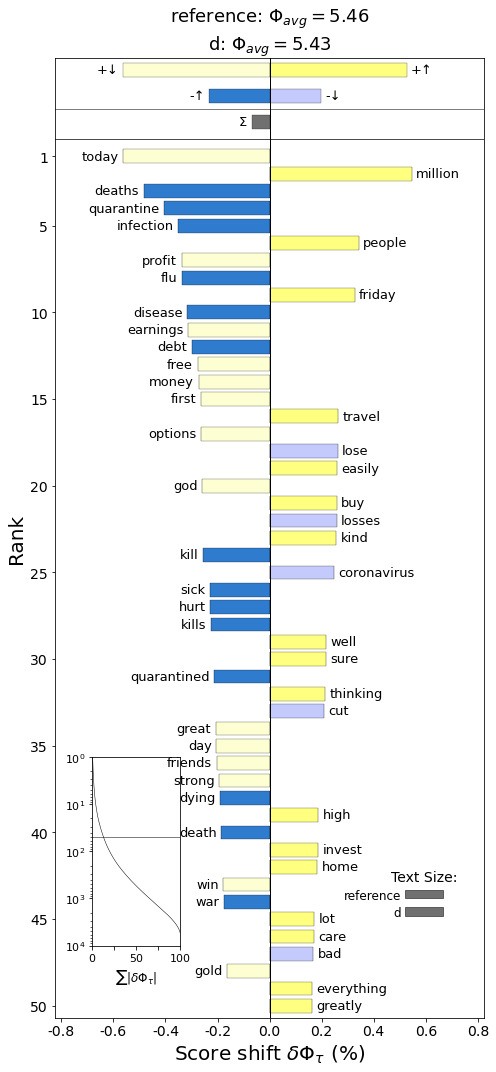

<AxesSubplot:title={'center':'reference: $\\Phi_{avg}=$5.46\nd: $\\Phi_{avg}=$5.43'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [26]:
# 2-8
sentiment_sh = sh.WeightedAvgShift(type2freq_1=p_ref,
                                  type2freq_2=p,
                                  type2score_1=labMt_dict,
                                  reference_value=5)
sentiment_sh.get_shift_graph(detailed=True,
                            system_names = ['reference', 'd'])

In [27]:
# 2-9


## Part 3: Communities for the Zachary Karate Club Network

_Exercise: Zachary's karate club_: In this exercise, we will work on Zarachy's karate club graph (refer to the Introduction of Chapter 9). The dataset is available in NetworkX, by calling the function [karate_club_graph](https://networkx.org/documentation/stable//auto_examples/graph/plot_karate_club.html) 

> 1. Visualize the graph using [netwulf](https://netwulf.readthedocs.io/en/latest/). Set the color of each node based on the club split (the information is stored as a node attribute). My version of the visualization is below.
>
> 2. Write a function to compute the __modularity__ of a graph partitioning (use **equation 9.12** in the book). The function should take a networkX Graph and a partitioning as inputs and return the modularity.
> 3. Explain in your own words the concept of _modularity_. 
> 4. Compute the modularity of the Karate club split partitioning using the function you just wrote. Note: the Karate club split partitioning is avilable as a [node attribute](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.classes.function.get_node_attributes.html), called _"club"_.
> 5. We will now perform a small randomization experiment to assess if the modularity you just computed is statitically different from $0$. To do so, we will implement the _double edge swap_ algorithm. The _double edge swap_ algorithm is quite old... it was implemented in 1891 (!) by Danish mathematician Julius Petersen(https://en.wikipedia.org/wiki/Julius_Petersen). Given a network G, this algorithm creates a new network, such that each node has exactly the same degree as in the original network, but different connections. Here is how the algorithm works.
>       * __a.__ Create an identical copy of your original network.
>       * __b.__ Consider two edges in your new network (u,v) and (x,y), such that u!=v and v!=x.
>       * __c.__ If none of edges (u,y) and (x,v) exists already, add them to the network and remove edges (u,v) and (x,y).
>       * Repeat steps __b.__ and __c.__ to achieve at least N swaps (I suggest N to be larger than the number of edges).
> 6. Double check that your algorithm works well, by showing that the degree of nodes in the original network and the new 'randomized' version of the network are the same.
> 7. Create $1000$ randomized version of the Karate Club network using the _double edge swap_ algorithm you wrote in step 5. For each of them, compute the modularity of the "club" split and store it in a list.
> 8. Compute the average and standard deviation of the modularity for the random network.
> 9. Plot the distribution of the "random" modularity. Plot the actual modularity of the club split as a vertical line (use [axvline](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html)). 
> 10. Comment on the figure. Is the club split a good partitioning? Why do you think I asked you to perform a randomization experiment? What is the reason why we preserved the nodes degree?
> 11.  Use [the Python Louvain-algorithm implementation](https://anaconda.org/auto/python-louvain) to find communities in this graph. Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the club split? What does this comparison reveal?
> 12.  Compare the communities found by the Louvain algorithm with the club split partitioning by creating a matrix **_D_** with dimension (2 times _A_), where _A_ is the number of communities found by Louvain. We set entry _D_(_i_,_j_) to be the number of nodes that community _i_ has in common with group split _j_. The matrix **_D_** is what we call a [**confusion matrix**](https://en.wikipedia.org/wiki/Confusion_matrix). Use the confusion matrix to explain how well the communities you've detected correspond to the club split partitioning.

_Exercise: Community detection on the GME network._
> * Consider the GME network you built in [Week 4](https://github.com/lalessan/comsocsci2022/blob/main/lectures/Week4.ipynb), part 2.
> * Use [the Python Louvain-algorithm implementation](https://anaconda.org/auto/python-louvain) to find communities. How many communities do you find? What are their sizes? Report the value of modularity found by the algorithm. Is the modularity significantly different than 0? 
> * Visualize the network, using netwulf (see Week 4). This time assign each node a different color based on their _community_. Describe the structure you observe.